In [27]:
%config IPCompleter.greedy=True

In [1]:
import tensorflow as tf
import tensorflow.python.keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy



Using TensorFlow backend.


Epoch 1/3
60000/60000 [==============================] - 16s 266us/step - loss: 0.2651 - acc: 0.9237
Epoch 2/3
60000/60000 [==============================] - 14s 229us/step - loss: 0.1116 - acc: 0.9658
Epoch 3/3
10000/10000 [==============================] - 0s 47us/step
0.09589594158791005
0.9689


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 95us/step
0.09589594158791005
0.9689


In [7]:
tf.keras.models.save_model(
    model,
    filepath='./model/epic_num_reader.h5',
    overwrite=True,
    include_optimizer=True
)


In [17]:
#from keras.models import save_model, load_model

# Creates a HDF5 file 'my_model.h5' 
#save_model(model, 'my_model.h5') # model, [path + "/"] name of model

# Deletes the existing model
#del model  

# Returns a compiled model identical to the previous one
#new_model = load_model('my_model.h5')

FailedPreconditionError: Error while reading resource variable dense/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/dense/bias/N10tensorflow3VarE does not exist.
	 [[node dense/bias/Read/ReadVariableOp (defined at <ipython-input-1-84cf6dba383e>:23)  = ReadVariableOp[dtype=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense/bias)]]
	 [[{{node dense/kernel/Read/ReadVariableOp/_13}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_10_dense/kernel/Read/ReadVariableOp", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense/bias/Read/ReadVariableOp', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-84cf6dba383e>", line 23, in <module>
    model.fit(x_train, y_train, epochs=3)  # train the model
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 1536, in fit
    validation_split=validation_split)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 992, in _standardize_user_data
    class_weight, batch_size)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 1032, in _standardize_weights
    self._set_inputs(x)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 474, in _method_wrapper
    method(self, *args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py", line 1242, in _set_inputs
    self.build(input_shape=input_shape)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py", line 222, in build
    layer.build(shape)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py", line 953, in build
    trainable=True)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 609, in add_weight
    aggregation=aggregation)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 639, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1977, in make_variable
    aggregation=aggregation)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 183, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 146, in _variable_v1_call
    aggregation=aggregation)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 125, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2437, in default_variable_creator
    import_scope=import_scope)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 187, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 297, in __init__
    constraint=constraint)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 449, in _init_from_args
    value = self._read_variable_op()
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 727, in _read_variable_op
    self._dtype)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/ops/gen_resource_variable_ops.py", line 508, in read_variable_op
    "ReadVariableOp", resource=resource, dtype=dtype, name=name)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/tikam/ML/mlenv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Error while reading resource variable dense/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/dense/bias/N10tensorflow3VarE does not exist.
	 [[node dense/bias/Read/ReadVariableOp (defined at <ipython-input-1-84cf6dba383e>:23)  = ReadVariableOp[dtype=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense/bias)]]
	 [[{{node dense/kernel/Read/ReadVariableOp/_13}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_10_dense/kernel/Read/ReadVariableOp", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [18]:
#new_model = tf.keras.models.load_model('./model/epic_num_reader.h5')
#new_model = tf.keras.models.load_model('./model/epic_num_reader.h5')
#from keras.models import save_model, load_model

# Creates a HDF5 file 'my_model.h5' 
#save_model(model, 'my_model.h5') # model, [path + "/"] name of model

# Deletes the existing model
#del model  

# Returns a compiled model identical to the previous one
#new_model = load_model('./model/epic_num_reader.h5')


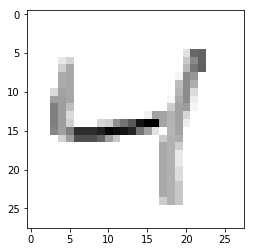

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
import matplotlib.pyplot as plt 

#plt.imshow(x_train[2])
plt.imshow(x_train[2],cmap=plt.cm.binary)
plt.show()
print(x_train[2])

NotImplementedError: Currently `save` requires model to be a graph network. Consider using `save_weights`, in order to save the weights of the model.